In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Loads the posts and comments dataset into seperate dataframes
redditdataset_posts = pd.read_csv('Top_Posts.csv')
redditdataset_comments = pd.read_csv('Top_Posts_Comments.csv')


In [3]:
redditdataset_posts=redditdataset_posts.drop(['post_url'], axis = 1)
redditdataset_posts=redditdataset_posts.drop(['flair_text'], axis = 1)
redditdataset_posts=redditdataset_posts.drop(['score'], axis = 1)
redditdataset_posts=redditdataset_posts.drop(['upvote_ratio'], axis = 1)
redditdataset_posts=redditdataset_posts.drop(['date-time'], axis = 1)
redditdataset_posts=redditdataset_posts.drop(['year'], axis = 1)
redditdataset_posts

,post_id,post_title,subreddit,comments
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,186
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,133
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,111
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,230
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,228
...,...,...,...,...
2982,slx33m,We live in beautiful times where you can learn...,artificial,6
2983,k9otbj,Yann LeCun’s Deep Learning Course Free From NYU,artificial,1
2984,k2orib,You Can Now Learn for FREE: 9 Courses by Googl...,artificial,2
2985,ex9w4w,"Chatbot trained on ""public domain social media...",artificial,10


In [4]:
# Merges the posts and comments dataset based on post_id
redditdataset_data = pd.merge(redditdataset_comments, redditdataset_posts[['post_id', 'subreddit']], left_on='post_id', 
    right_on='post_id')

In [5]:
redditdataset_posts.describe()


,comments
count,2987.000000
mean,72.939739
std,92.253969
min,0.000000
25%,19.000000
50%,45.000000
75%,99.500000
max,2361.000000


In [6]:
redditdataset_comments.describe()

,post_id,comment
count,223174,223159
unique,2988,209561
top,k77sxz,[deleted]
freq,2419,7544


In [7]:
# Keep only the comments and subreddit columns
redditdataset_data = redditdataset_data[['comment', 'subreddit']]

In [8]:
redditdataset_data['comment'] = redditdataset_data['comment'].fillna('')

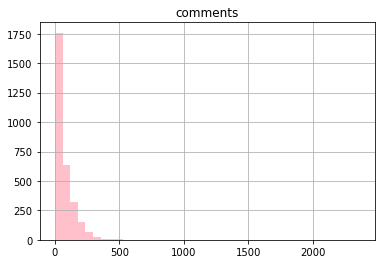

In [65]:
redditdataset_posts.hist(bins=40, figsize=(6,4), color='pink')
plt.show()


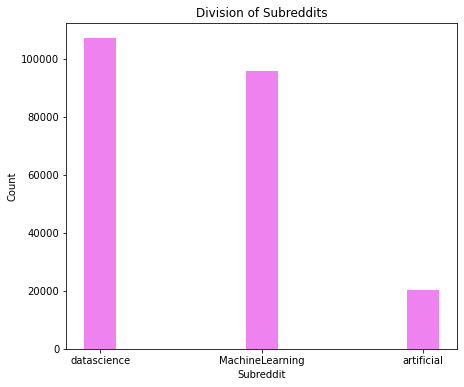

In [10]:
# Create a bar chart showing the division of subreddits
subreddit_counts = redditdataset_data['subreddit'].value_counts()
fig, ax = plt.subplots(figsize=(7,6))
ax.bar(subreddit_counts.index, subreddit_counts.values, width=0.2, color='violet')
ax.set_title('Division of Subreddits')
ax.set_xlabel('Subreddit')
ax.set_ylabel('Count')
plt.show()

In [12]:
# Split the dataset into training and testing sets
X_training, X_testing, y_training, y_testing = train_test_split(redditdataset_data['comment'], redditdataset_data['subreddit'], test_size=0.3, random_state=51)


In [13]:
# Create a TfidfVectorizer to convert text data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_training_tfidf = vectorizer.fit_transform(X_training)

In [14]:
# Train the machine learning models on the training data
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_training_tfidf, y_training)

KNeighborsClassifier()

In [15]:
# Transform the test data using the same TfidfVectorizer
X_testing_tfidf = vectorizer.transform(X_testing)
# Use the trained classifier to predict the subreddit labels of the test data
y_pred = knnmodel.predict(X_testing_tfidf)

In [16]:
# Evaluate the performance of the classifier
knn_acc_5 = accuracy_score(y_testing, y_pred)
print("Accuracy: ", knn_acc_5)
print("Classification Report: ", classification_report(y_testing, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_testing, y_pred))

Accuracy:  0.4805156009618975
Classification Report:                   precision    recall  f1-score   support

MachineLearning       0.48      0.46      0.47     28660
     artificial       0.13      0.10      0.12      6045
    datascience       0.53      0.57      0.55     32246

       accuracy                           0.48     66951
      macro avg       0.38      0.38      0.38     66951
   weighted avg       0.47      0.48      0.48     66951

Confusion Matrix:  [[13144  1961 13555]
 [ 2617   619  2809]
 [11829  2009 18408]]


In [69]:
# Take an input comment and predict which subreddit it belongs to
input_comment = "This will be amazing if released, even as a beta. Definitely can see this being very useful"
input_tfidf = vectorizer.transform([input_comment])
forecasted_subreddit = knnmodel.predict(input_tfidf)[0]

print("The comment implies to the", forecasted_subreddit, "subreddit.")

The comment implies to the MachineLearning subreddit.


In [17]:
# Train the machine learning models on the training data
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_training_tfidf, y_training)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Transform the test data using the same TfidfVectorizer
X_testing_tfidf = vectorizer.transform(X_testing)
# Use the trained classifier to predict the subreddit labels of the test data
y_pred = knnmodel.predict(X_testing_tfidf)

In [19]:
# Evaluate the performance of the classifier
knn_acc_3 = accuracy_score(y_testing, y_pred)
print("Accuracy: ", knn_acc_3)
print("Classification Report: ", classification_report(y_testing, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_testing, y_pred))

Accuracy:  0.5068931009245567
Classification Report:                   precision    recall  f1-score   support

MachineLearning       0.55      0.15      0.23     28660
     artificial       0.30      0.04      0.06      6045
    datascience       0.50      0.92      0.65     32246

       accuracy                           0.51     66951
      macro avg       0.45      0.37      0.32     66951
   weighted avg       0.50      0.51      0.42     66951

Confusion Matrix:  [[ 4186   298 24176]
 [  930   219  4896]
 [ 2490   224 29532]]


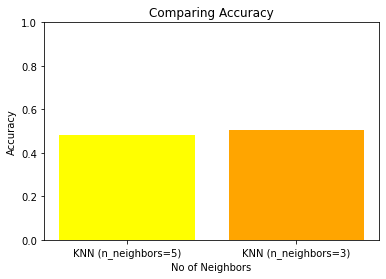

In [20]:
import matplotlib.pyplot as plt

# Define the colors for each bar
shades = ['yellow', 'orange']

# Define the accuracies and bar labels
accuracies = [ knn_acc_5, knn_acc_3]
labels = ['KNN (n_neighbors=5)', 'KNN (n_neighbors=3)']

# Create a bar chart showing the accuracies
plt.bar(labels, accuracies, color=shades)
plt.title('Comparing Accuracy')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()


In [85]:
# Train the machine learning models on the training data
dtcmodel = DecisionTreeClassifier(random_state=51)
dtcmodel.fit(X_training_tfidf, y_training)

# Transform the test data using the same TfidfVectorizer
X_testing_tfidf = vectorizer.transform(X_testing)
# Use the trained classifier to predict the subreddit labels of the test data
y_pred = dtcmodel.predict(X_testing_tfidf)

# Evaluate the performance of the classifier
dt_acc_nomaxdepth = accuracy_score(y_testing, y_pred)
print("Accuracy: ", dt_acc_nomaxdepth)
print("Classification Report: ", classification_report(y_testing, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_testing, y_pred))

Accuracy:  0.626980926349121
Classification Report:                   precision    recall  f1-score   support

MachineLearning       0.60      0.64      0.62     28660
     artificial       0.26      0.16      0.20      6045
    datascience       0.69      0.70      0.70     32246

       accuracy                           0.63     66951
      macro avg       0.52      0.50      0.51     66951
   weighted avg       0.62      0.63      0.62     66951

Confusion Matrix:  [[18465  1975  8220]
 [ 3309   995  1741]
 [ 8830   899 22517]]


In [82]:
# Train the machine learning models on the training data
dtcmodel = DecisionTreeClassifier(random_state=51, max_depth =500)
dtcmodel.fit(X_training_tfidf, y_training)

DecisionTreeClassifier(max_depth=1000, random_state=51)

In [83]:
# Transform the test data using the same TfidfVectorizer
X_testing_tfidf = vectorizer.transform(X_testing)
# Use the trained classifier to predict the subreddit labels of the test data
y_pred = dtcmodel.predict(X_testing_tfidf)

In [84]:
# Evaluate the performance of the classifier
dt_acc_withmaxdepth = accuracy_score(y_testing, y_pred)
print("Accuracy: ", dt_acc_withmaxdepth)
print("Classification Report: ", classification_report(y_testing, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_testing, y_pred))

Accuracy:  0.6309539812698839
Classification Report:                   precision    recall  f1-score   support

MachineLearning       0.62      0.61      0.62     28660
     artificial       0.28      0.16      0.20      6045
    datascience       0.67      0.74      0.70     32246

       accuracy                           0.63     66951
      macro avg       0.53      0.50      0.51     66951
   weighted avg       0.62      0.63      0.62     66951

Confusion Matrix:  [[17491  1730  9439]
 [ 2966   966  2113]
 [ 7744   716 23786]]


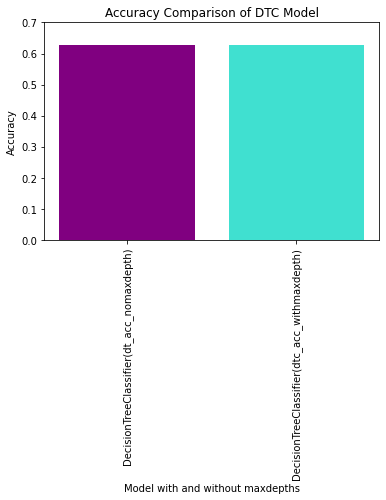

In [64]:
# Define the colors for each bar
shades = ['purple', 'turquoise']

# Define the accuracies and bar labels
accuracies = [dt_acc_nomaxdepth, dt_acc_withmaxdepth]
labels = ['DecisionTreeClassifier(dt_acc_nomaxdepth)', 'DecisionTreeClassifier(dtc_acc_withmaxdepth)']

# Create a bar graph with space between bars
plt.bar(labels, accuracies, width=0.05)

# Create a bar chart showing the accuracies
plt.bar(labels, accuracies, color=shades)
plt.xticks(rotation=90)
plt.title('Accuracy Comparison of DTC Model')
plt.xlabel('Model with and without maxdepths')
plt.ylabel('Accuracy')
plt.ylim(0.0, 0.7)

plt.show()


In [40]:
# Train the machine learning models on the training data
lrmodel = LogisticRegression(max_iter=500)
lrmodel.fit(X_training_tfidf, y_training)



LogisticRegression(max_iter=500)

In [43]:
# Transform the test data using the same TfidfVectorizer
X_testing_tfidf = vectorizer.transform(X_testing)
# Use the trained classifier to predict the subreddit labels of the test data
y_pred = lrmodel.predict(X_testing_tfidf)


In [45]:
# Evaluate the performance of the classifier
lr_acc = accuracy_score(y_testing, y_pred)
print("Accuracy: ", lr_acc)
print("Classification Report: ", classification_report(y_testing, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_testing, y_pred))

Accuracy:  0.7214530029424504
Classification Report:                   precision    recall  f1-score   support

MachineLearning       0.68      0.76      0.72     28660
     artificial       0.52      0.13      0.21      6045
    datascience       0.77      0.80      0.78     32246

       accuracy                           0.72     66951
      macro avg       0.66      0.56      0.57     66951
   weighted avg       0.71      0.72      0.70     66951

Confusion Matrix:  [[21776   558  6326]
 [ 3733   784  1528]
 [ 6351   153 25742]]


In [50]:
nbmodel =  MultinomialNB()
nbmodel.fit(X_training_tfidf, y_training)

MultinomialNB()

In [51]:
# Use the trained classifier to predict the subreddit labels of the test data
y_pred = nbmodel.predict(X_testing_tfidf)

In [52]:
# Evaluate the performance of the classifier
naive_cc = accuracy_score(y_testing, y_pred)
print("Accuracy: ", naive_cc)
print("Classification Report: ", classification_report(y_testing, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_testing, y_pred))

Accuracy:  0.7111469582231782
Classification Report:                   precision    recall  f1-score   support

MachineLearning       0.69      0.72      0.70     28660
     artificial       0.70      0.00      0.01      6045
    datascience       0.73      0.84      0.78     32246

       accuracy                           0.71     66951
      macro avg       0.71      0.52      0.50     66951
   weighted avg       0.71      0.71      0.68     66951

Confusion Matrix:  [[20497     5  8158]
 [ 4218    19  1808]
 [ 5147     3 27096]]


In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline    
# Create a pipeline to convert text data into a matrix of TF-IDF features and train a Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])


# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid={
    'clf__alpha': [0.5, 1.0, 1.5]
}, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_training, y_training)

# Print the best hyperparameters and corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Evaluate the performance of the tuned classifier on the test data
y_pred = grid_search.predict(X_testing)
print("Accuracy: ", accuracy_score(y_testing, y_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .....................................clf__alpha=0.5; total time=   3.3s
[CV] END .....................................clf__alpha=0.5; total time=   3.3s
[CV] END .....................................clf__alpha=0.5; total time=   3.3s
[CV] END .....................................clf__alpha=1.0; total time=   3.3s
[CV] END .....................................clf__alpha=1.0; total time=   3.5s
[CV] END .....................................clf__alpha=1.0; total time=   3.4s
[CV] END .....................................clf__alpha=1.5; total time=   3.3s
[CV] END .....................................clf__alpha=1.5; total time=   3.4s
[CV] END .....................................clf__alpha=1.5; total time=   3.3s
Best parameters:  {'clf__alpha': 0.5}
Best accuracy score:  0.7092185853846087
Accuracy:  0.7138354916282057


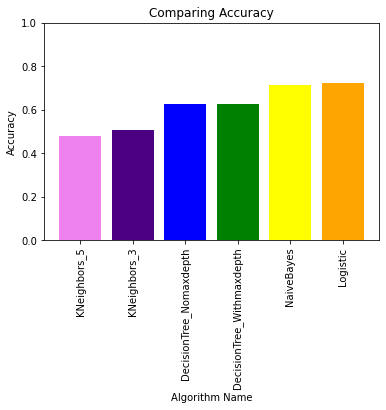

In [63]:
import matplotlib.pyplot as plt

# Define the colors for each bar
shades = ['violet', 'indigo', 'blue', 'green','yellow','orange']

# Create a bar chart showing the accuracies
plt.bar(['KNeighbors_5','KNeighbors_3', 'DecisionTree_Nomaxdepth', 'DecisionTree_Withmaxdepth', 'NaiveBayes', 'Logistic'], [knn_acc_5,knn_acc_3,dt_acc_nomaxdepth, dt_acc_withmaxdepth, naive_cc, lr_acc], color=shades)
plt.xticks(rotation=90,)
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracy')
plt.title('Comparing Accuracy')
plt.ylim(0.0, 1.0)
plt.show()



In [ ]:
#References
#https://www.geeksforgeeks.org/read-multiple-csv-files-into-separate-dataframes-in-python/
#https://www.geeksforgeeks.org/merge-two-pandas-dataframes-on-certain-columns/
#https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
#https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
#https://datagy.io/histogram-python/#:~:text=A%20histogram%20is%20a%20chart%20that%20uses%20bars,the%20spread%20of%20a%20continuous%20sample%20of%20data.common way to split a dataset into training and testing sets for machine learning tasks
#https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
#https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/
#https://www.geeksforgeeks.org/sklearn-feature-extraction-with-tf-idf/
#https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/
#https://builtin.com/data-science/evaluating-classification-models
#https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#https://stackoverflow.com/que/stions/62178829/how-to-use-tf-idf-features-for-training-your-model
